In [1]:
import time
import pandas as pd
import warnings
import feather
warnings.filterwarnings('ignore')
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
pd.set_option('display.max_columns', None)

In [2]:
DF_09 = pd.read_csv('2009/SCHOOL.csv')
DF_10 = pd.read_csv('2010/SCHOOL.csv')
DF_11 = pd.read_csv('2011/SCHOOL.csv')
DF_12 = pd.read_csv('2012/SCHOOL.csv')
DF_13 = pd.read_csv('2013/SCHOOL.csv')
DF_14 = pd.read_csv('2014/SCHOOL.csv')
DF_15 = pd.read_csv('2015/SCHOOL.csv')
DF_16 = pd.read_csv('2016/SCHOOL.csv')
DF_17 = pd.read_csv('2017/SCHOOL.csv')
DF_18 = pd.read_csv('2018/SCHOOL.csv')

In [3]:
DF = pd.concat([DF_09,DF_10,DF_11,DF_12,DF_13,DF_14,DF_15,DF_16,DF_17,DF_18])

In [4]:
k= pd.DataFrame()
k['miss'] = DF.isnull().sum()/DF.shape[0]
k['type'] = DF.dtypes
k.T

,CO_ESCOLA,CO_MUNICIPIO,CO_UF,CO_DEPENDENCIA_ADM,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BANHEIRO_FORA_PREDIO,IN_BANHEIRO_PNE,IN_DEPENDENCIAS_PNE,QT_SALAS_UTILIZADAS,QT_EQUIP_TV,QT_EQUIP_DVD,QT_EQUIP_COPIADORA,QT_EQUIP_IMPRESSORA,QT_COM_ADMINISTRATIVO,QT_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,QT_FUNCIONARIOS,IN_ALIMENTACAO,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,TITULACAO,NU_GRADUACAO,NU_ESPECIALIZACAO,NU_MESTRADO,NU_DOUTORADO,CO_ANO,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,EDU_PAI,EDU_MAE,QT_PESSOAS_CASA,RENDA_MENSAL,NU_NOTA_GERAL,TARGET,TP_COR_RACA_TEMP
miss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0119045,0.0460471,0.00420071,0.0224282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.105507,0,0,0,0,0,0,0,0,0,0,0,0.894493
type,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64


In [5]:
#There are not schools with high speed internet and no internet, as expected.
DF[(DF.IN_BANDA_LARGA == 1)&(DF.IN_BANDA_LARGA.isnull())]

,CO_ESCOLA,CO_MUNICIPIO,CO_UF,CO_DEPENDENCIA_ADM,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BANHEIRO_FORA_PREDIO,IN_BANHEIRO_PNE,IN_DEPENDENCIAS_PNE,QT_SALAS_UTILIZADAS,QT_EQUIP_TV,QT_EQUIP_DVD,QT_EQUIP_COPIADORA,QT_EQUIP_IMPRESSORA,QT_COM_ADMINISTRATIVO,QT_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,QT_FUNCIONARIOS,IN_ALIMENTACAO,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,TITULACAO,NU_GRADUACAO,NU_ESPECIALIZACAO,NU_MESTRADO,NU_DOUTORADO,CO_ANO,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,EDU_PAI,EDU_MAE,QT_PESSOAS_CASA,RENDA_MENSAL,NU_NOTA_GERAL,TARGET,TP_COR_RACA_TEMP


In [6]:
#by context, lets fill it with 0
DF.fillna(0, inplace=True,)

In [7]:
fields = ['IN_AGUA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_ENERGIA_INEXISTENTE', 'QT_EQUIP_TV','QT_EQUIP_DVD', 
          'QT_COM_ADMINISTRATIVO','QT_EQUIP_IMPRESSORA','QT_EQUIP_COPIADORA', 'IN_BANDA_LARGA', 'IN_BIBLIOTECA', 
          'IN_LABORATORIO_INFORMATICA', 'IN_LABORATORIO_CIENCIAS',]

DF['IN_INFRA_NENHUMA'] = 1


infra_elementar = (DF.IN_AGUA_INEXISTENTE==0) & (DF.IN_ESGOTO_INEXISTENTE==0)&(DF.IN_ENERGIA_INEXISTENTE ==0)
infra_basica = (DF.QT_EQUIP_TV!=0) & (DF.QT_EQUIP_DVD !=0) & (DF.QT_COM_ADMINISTRATIVO!=0) & (
    DF.QT_EQUIP_IMPRESSORA!=0)

infra_adequada = (DF.QT_EQUIP_COPIADORA != 0)&(DF.IN_BANDA_LARGA != 0)|(DF.IN_BIBLIOTECA!=0)&(
    DF.IN_LABORATORIO_INFORMATICA!=0) 

infra_avancada = (DF.IN_LABORATORIO_CIENCIAS!=0)

DF.loc[(infra_elementar), 'IN_INFRA_ELEMENTAR'] = 1
DF.loc[((infra_elementar) & (infra_basica)), 'IN_INFRA_BASICA'] = 1
DF.loc[((infra_elementar)& (infra_basica) & (infra_adequada)), 'IN_INFRA_ADEQUADA'] = 1
DF.loc[((infra_elementar)& (infra_basica) & (infra_adequada) & (infra_avancada)), 'IN_INFRA_AVANCADA'] = 1

DF.loc[DF['IN_INFRA_ELEMENTAR']==1, 'IN_INFRA_NENHUMA']=0
DF.loc[(DF.IN_INFRA_ELEMENTAR==1) & (DF.IN_INFRA_BASICA==1), 'IN_INFRA_ELEMENTAR'] = 0
DF.loc[(DF.IN_INFRA_BASICA==1) & (DF.IN_INFRA_ADEQUADA==1), 'IN_INFRA_BASICA'] = 0
DF.loc[(DF.IN_INFRA_ADEQUADA==1) & (DF.IN_INFRA_AVANCADA==1), 'IN_INFRA_ADEQUADA'] = 0

DF['IN_TP_ESCOLA'] = ""
DF.loc[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3), 'IN_TP_ESCOLA']= 'Municipal+Estadual'
DF.loc[(DF.CO_DEPENDENCIA_ADM == 4), 'IN_TP_ESCOLA'] = 'Privada'
DF.loc[(DF.CO_DEPENDENCIA_ADM == 1), 'IN_TP_ESCOLA'] = 'Federal'



#((DF.IN_INFRA_BASICA==1)| (DF.IN_INFRA_ADEQUADA==1)|(DF.IN_INFRA_AVANCADA==1))

In [8]:
DF[['IN_INFRA_ELEMENTAR', 'IN_INFRA_BASICA', 'IN_INFRA_ADEQUADA', 
    'IN_INFRA_AVANCADA']] = DF[['IN_INFRA_ELEMENTAR', 'IN_INFRA_BASICA', 'IN_INFRA_ADEQUADA', 
                                'IN_INFRA_AVANCADA']].fillna(0)

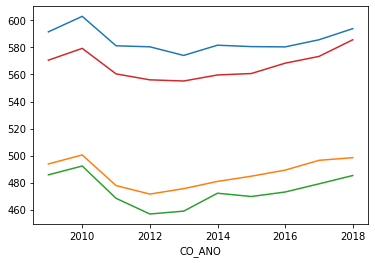

In [9]:
DF[DF['CO_DEPENDENCIA_ADM']==1].groupby(['CO_ANO'])['NU_NOTA_GERAL'].mean().plot()
DF[DF['CO_DEPENDENCIA_ADM']==2].groupby(['CO_ANO'])['NU_NOTA_GERAL'].mean().plot()
DF[DF['CO_DEPENDENCIA_ADM']==3].groupby(['CO_ANO'])['NU_NOTA_GERAL'].mean().plot()
DF[DF['CO_DEPENDENCIA_ADM']==4].groupby(['CO_ANO'])['NU_NOTA_GERAL'].mean().plot()

In [11]:
DF.to_csv('ALL_SCHOOLS.csv', index =False)

In [10]:
DF.columns

Index(['CO_ESCOLA', 'CO_MUNICIPIO', 'CO_UF', 'CO_DEPENDENCIA_ADM',
       'IN_AGUA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE',
       'IN_ENERGIA_INEXISTENTE', 'IN_LABORATORIO_INFORMATICA',
       'IN_LABORATORIO_CIENCIAS', 'IN_SALA_ATENDIMENTO_ESPECIAL',
       'IN_BIBLIOTECA', 'IN_SALA_LEITURA', 'IN_BANHEIRO_FORA_PREDIO',
       'IN_BANHEIRO_PNE', 'IN_DEPENDENCIAS_PNE', 'QT_SALAS_UTILIZADAS',
       'QT_EQUIP_TV', 'QT_EQUIP_DVD', 'QT_EQUIP_COPIADORA',
       'QT_EQUIP_IMPRESSORA', 'QT_COM_ADMINISTRATIVO', 'QT_COMP_ALUNO',
       'IN_INTERNET', 'IN_BANDA_LARGA', 'QT_FUNCIONARIOS', 'IN_ALIMENTACAO',
       'IN_ESPECIALIZACAO', 'IN_MESTRADO', 'IN_DOUTORADO', 'TITULACAO',
       'NU_GRADUACAO', 'NU_ESPECIALIZACAO', 'NU_MESTRADO', 'NU_DOUTORADO',
       'CO_ANO', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'EDU_PAI', 'EDU_MAE', 'QT_PESSOAS_CASA',
       'RENDA_MENSAL', 'NU_NOTA_GERAL', 'TARGET